# BUS5PR1 – Artificial Intelligence and Hyperautomation
Assignment 03: Predictive Analytics and Conversational AI

Student name: My Hao, Lam (Elena)

Student ID: 21435050

## Table of content


1.   Activity 1

    1.1 Data Pre-processing
    
    1.3 Analysis of Machine Learning Models

    1.4 Model Explainability - Using SHAP framework



## 1. Activity 1

### 1.1 Data Pre-processing

#### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold


#### Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/2024 - S2/Hyper AI/Assignment 3/'

testing_set = pd.read_csv(file_path + 'test.csv')
training_set = pd.read_csv(file_path + 'train.csv')

In [ ]:
# Check variable types
print(testing_set.dtypes)
print(training_set.dtypes)

# Check data shape
print("testing_shape:", testing_set.shape)
print("training_shape:", training_set.shape)

# Check dataset length
print("testing_length:", len(testing_set))
print("training_length:", len(training_set))

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float6

In [ ]:
# Check data info
print("testing_info:", testing_set.info())
print("training_info:", training_set.info())

# Check unique data
print("testing_unique_data:", testing_set.nunique())
print("training_unique_data:", training_set.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2000 non-null   int64  
 1   job             2000 non-null   object 
 2   marital         2000 non-null   object 
 3   education       2000 non-null   object 
 4   default         2000 non-null   object 
 5   housing         2000 non-null   object 
 6   loan            2000 non-null   object 
 7   contact         2000 non-null   object 
 8   month           2000 non-null   object 
 9   day_of_week     2000 non-null   object 
 10  duration        2000 non-null   int64  
 11  campaign        2000 non-null   int64  
 12  pdays           2000 non-null   int64  
 13  previous        2000 non-null   int64  
 14  poutcome        2000 non-null   object 
 15  emp.var.rate    2000 non-null   float64
 16  cons.price.idx  2000 non-null   float64
 17  cons.conf.idx   2000 non-null   f

In [ ]:
# Check Ordinal data
print(testing_set['day_of_week'].unique())
print(testing_set['education'].unique())
print(testing_set['month'].unique())
print(testing_set['poutcome'].unique())

['thu' 'fri' 'mon' 'tue' 'wed']
['university.degree' 'basic.9y' 'high.school' 'unknown' 'basic.6y'
 'professional.course' 'basic.4y' 'illiterate']
['apr' 'may' 'jun' 'jul' 'aug' 'nov' 'oct' 'sep' 'mar' 'dec']
['nonexistent' 'failure' 'success']


In [ ]:
# Handle categorical variables
# Ordinal variable
testing_set['education'] = testing_set['education'].replace({
    'illiterate': 1,
    'basic.4y': 2,
    'basic.6y': 3,
    'basic.9y': 4,
    'high.school': 5,
    'professional.course': 6,
    'university.degree': 7,
    'unknown': 0
})

testing_set['day_of_week'] = testing_set['day_of_week'].replace({
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
})

testing_set['month'] = testing_set['month'].replace({
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
})


training_set['education'] = training_set['education'].replace({
    'illiterate': 1,
    'basic.4y': 2,
    'basic.6y': 3,
    'basic.9y': 4,
    'high.school': 5,
    'professional.course': 6,
    'university.degree': 7,
    'unknown': 0
})

training_set['day_of_week'] = training_set['day_of_week'].replace({
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
})

training_set['month'] = training_set['month'].replace({
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
})

# Binary variable
training_set['y'] = training_set['y'].replace({'no': 0, 'yes': 1})

<ipython-input-7-fbc8e8825670>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testing_set['education'] = testing_set['education'].replace({
<ipython-input-7-fbc8e8825670>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testing_set['day_of_week'] = testing_set['day_of_week'].replace({
<ipython-input-7-fbc8e8825670>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beha

In [ ]:
# Summary of both 2 dataset
print("testing_describe:", testing_set.describe())
print("training_describe:", training_set.describe())

testing_describe:                age    education       month  day_of_week     duration  \
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000   
mean     40.220500     4.979000     6.64450     2.971000   252.680500   
std      10.376546     1.906142     2.04529     1.399335   254.828782   
min      17.000000     0.000000     3.00000     1.000000     0.000000   
25%      32.000000     4.000000     5.00000     2.000000   102.000000   
50%      39.000000     5.000000     6.00000     3.000000   174.000000   
75%      47.000000     7.000000     8.00000     4.000000   314.500000   
max      88.000000     7.000000    12.00000     5.000000  3284.000000   

          campaign        pdays     previous  emp.var.rate  cons.price.idx  \
count  2000.000000  2000.000000  2000.000000   2000.000000     2000.000000   
mean      2.645500   956.298500     0.175500      0.087250       93.575396   
std       3.017015   201.500634     0.497819      1.568739        0.578723   
min       1.

In [ ]:
testing_set.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,27,services,single,7,no,yes,no,cellular,4,4,297,1,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1
1,31,self-employed,divorced,4,no,yes,no,cellular,5,5,12,10,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1
2,34,unemployed,married,4,no,yes,no,cellular,5,4,218,4,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1
3,49,admin.,divorced,5,no,no,no,telephone,5,4,136,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
4,29,admin.,married,0,no,unknown,unknown,telephone,6,5,83,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1


In [ ]:
training_set.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,48,admin.,divorced,7,no,yes,no,cellular,11,5,...,3,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,0
1,33,technician,divorced,5,no,no,no,cellular,11,2,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
2,75,retired,divorced,2,unknown,yes,no,cellular,10,4,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,1
3,35,technician,married,6,no,yes,yes,cellular,5,3,...,1,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,0
4,42,admin.,divorced,7,no,yes,no,cellular,8,1,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0


In [ ]:
# Check missing data

print("Missing data in testing set:")
print(testing_set.isnull().sum())

print("Missing data in training set:")
print(training_set.isnull().sum())

Missing data in testing set:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64
Missing data in training set:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
# Check duplicate data
testing_set.duplicated().any()
training_set.duplicated().any()

True

In [ ]:
# Sum duplicate data
print("Duplicate data in testing set:")
print(testing_set.duplicated().sum())

print("Duplicate data in training set:")
print(training_set.duplicated().sum())

Duplicate data in testing set:
0
Duplicate data in training set:
11


In [ ]:
# Drop duplicate data
training_set = training_set.drop_duplicates()
print("Duplicate data in training set:")
print(training_set.duplicated().sum())

Duplicate data in training set:
0


#### Correlation

In [ ]:
# Select only numeric columns
numeric_training_set = training_set.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix_training_set = numeric_training_set.corr()

# Display the correlation matrix
print(correlation_matrix_training_set)

                     age  education     month  day_of_week  duration  \
age             1.000000  -0.183359  0.077912    -0.019355 -0.000677   
education      -0.183359   1.000000  0.115707    -0.004187 -0.016079   
month           0.077912   0.115707  1.000000    -0.007578 -0.018901   
day_of_week    -0.019355  -0.004187 -0.007578     1.000000  0.010818   
duration       -0.000677  -0.016079 -0.018901     0.010818  1.000000   
campaign        0.003664  -0.001832 -0.030131     0.014400 -0.071821   
pdays          -0.035848  -0.023564 -0.079977     0.007271 -0.049177   
previous        0.022386   0.016496  0.061801     0.005456  0.021734   
emp.var.rate    0.001251  -0.039993  0.059492    -0.005345 -0.027771   
cons.price.idx  0.002570  -0.097864 -0.150213    -0.005519  0.005472   
cons.conf.idx   0.130731   0.038048  0.264413    -0.001724 -0.008637   
euribor3m       0.012124  -0.031272  0.164075    -0.006523 -0.032778   
nr.employed    -0.016959  -0.021741  0.133528    -0.001375 -0.04

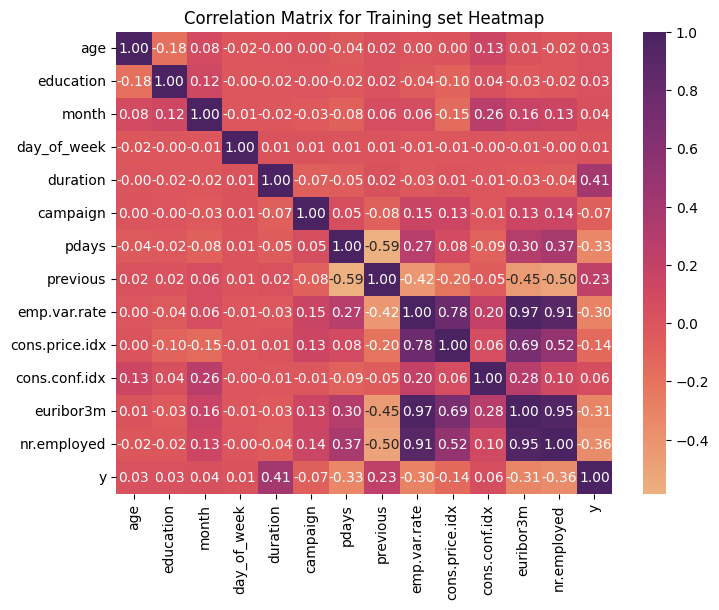

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix_training_set, annot=True, cmap='flare', fmt=".2f")

# Show the plot
plt.title('Correlation Matrix for Training set Heatmap')
plt.show()

In [ ]:
# Select only numeric columns
numeric_testing_set = testing_set.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix_testing_set = numeric_testing_set.corr()

# Display the correlation matrix
print(correlation_matrix_testing_set)

                     age  education     month  day_of_week  duration  \
age             1.000000  -0.155057  0.063024    -0.001213 -0.003813   
education      -0.155057   1.000000  0.117802    -0.001166 -0.006827   
month           0.063024   0.117802  1.000000     0.007058 -0.026155   
day_of_week    -0.001213  -0.001166  0.007058     1.000000  0.004710   
duration       -0.003813  -0.006827 -0.026155     0.004710  1.000000   
campaign        0.020571  -0.000860 -0.039971     0.027424 -0.070431   
pdays          -0.006889   0.010563 -0.071963    -0.002650 -0.018684   
previous        0.062715   0.036044  0.102086    -0.024287 -0.001667   
emp.var.rate   -0.033060  -0.017154  0.045438     0.015715 -0.030625   
cons.price.idx -0.032676  -0.068443 -0.153596     0.014127  0.002434   
cons.conf.idx   0.100273   0.041909  0.260510     0.032680  0.001287   
euribor3m      -0.016968  -0.006473  0.148953     0.015181 -0.033881   
nr.employed    -0.033571   0.001172  0.114813     0.013418 -0.04

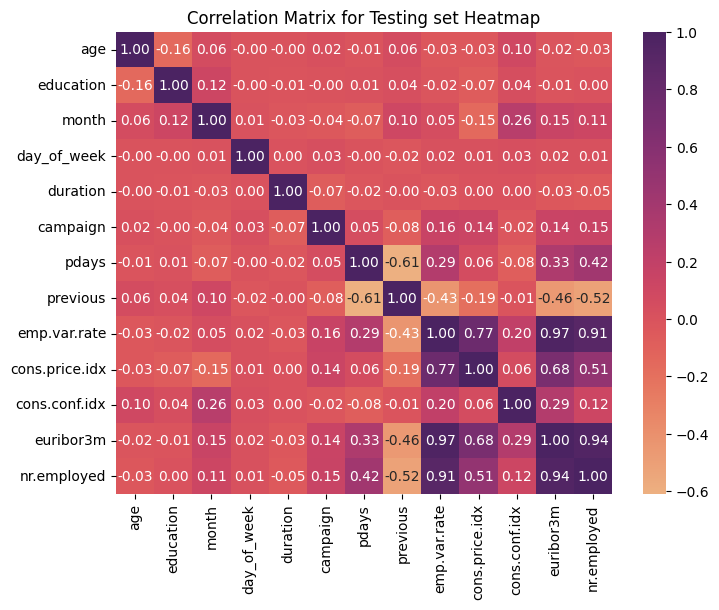

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix_testing_set, annot=True, cmap='flare', fmt=".2f")

# Show the plot
plt.title('Correlation Matrix for Testing set Heatmap')
plt.show()

#### Outlier

In [ ]:
import plotly.express as px
# Create the box plot Testing set
test_age = px.box(numeric_testing_set, y='age')
test_duration= px.box(numeric_testing_set, y='duration')
test_campaign= px.box(numeric_testing_set, y='campaign')
test_pdays= px.box(numeric_testing_set, y='pdays')
test_previous= px.box(numeric_testing_set, y='previous')
test_emp_var_rate= px.box(numeric_testing_set, y='emp.var.rate')
test_cons_price_idx= px.box(numeric_testing_set, y='cons.price.idx')
test_cons_conf_idx= px.box(numeric_testing_set, y='cons.conf.idx')
test_euribor3m= px.box(numeric_testing_set, y='euribor3m')
test_nr_employed= px.box(numeric_testing_set, y='nr.employed')
test_month= px.box(numeric_testing_set, y='month')
test_dayofweek= px.box(numeric_testing_set, y='day_of_week')
test_education= px.box(numeric_testing_set, y='education')


# Show the figure Testing set
test_age.show()
test_duration.show()
test_campaign.show()
test_pdays.show()
test_previous.show()
test_emp_var_rate.show()
test_cons_price_idx.show()
test_cons_conf_idx.show()
test_euribor3m.show()
test_nr_employed.show()
test_month.show()
test_dayofweek.show()
test_education.show()

In [ ]:
# Create the box plot Training set
training_age = px.box(numeric_training_set, y='age')
training_duration= px.box(numeric_training_set, y='duration')
training_campaign= px.box(numeric_training_set, y='campaign')
training_pdays= px.box(numeric_training_set, y='pdays')
training_previous= px.box(numeric_training_set, y='previous')
training_emp_var_rate= px.box(numeric_training_set, y='emp.var.rate')
training_cons_price_idx= px.box(numeric_training_set, y='cons.price.idx')
training_cons_conf_idx= px.box(numeric_training_set, y='cons.conf.idx')
training_euribor3m= px.box(numeric_training_set, y='euribor3m')
training_nr_employed= px.box(numeric_training_set, y='nr.employed')
training_month= px.box(numeric_testing_set, y='month')
training_dayofweek= px.box(numeric_testing_set, y='day_of_week')
training_education= px.box(numeric_testing_set, y='education')


# Show the figure Training set
training_age.show()
training_duration.show()
training_campaign.show()
training_pdays.show()
training_previous.show()
training_emp_var_rate.show()
training_cons_price_idx.show()
training_cons_conf_idx.show()
training_euribor3m.show()
training_nr_employed.show()
training_month.show()
training_dayofweek.show()
training_education.show()

#### Skewness

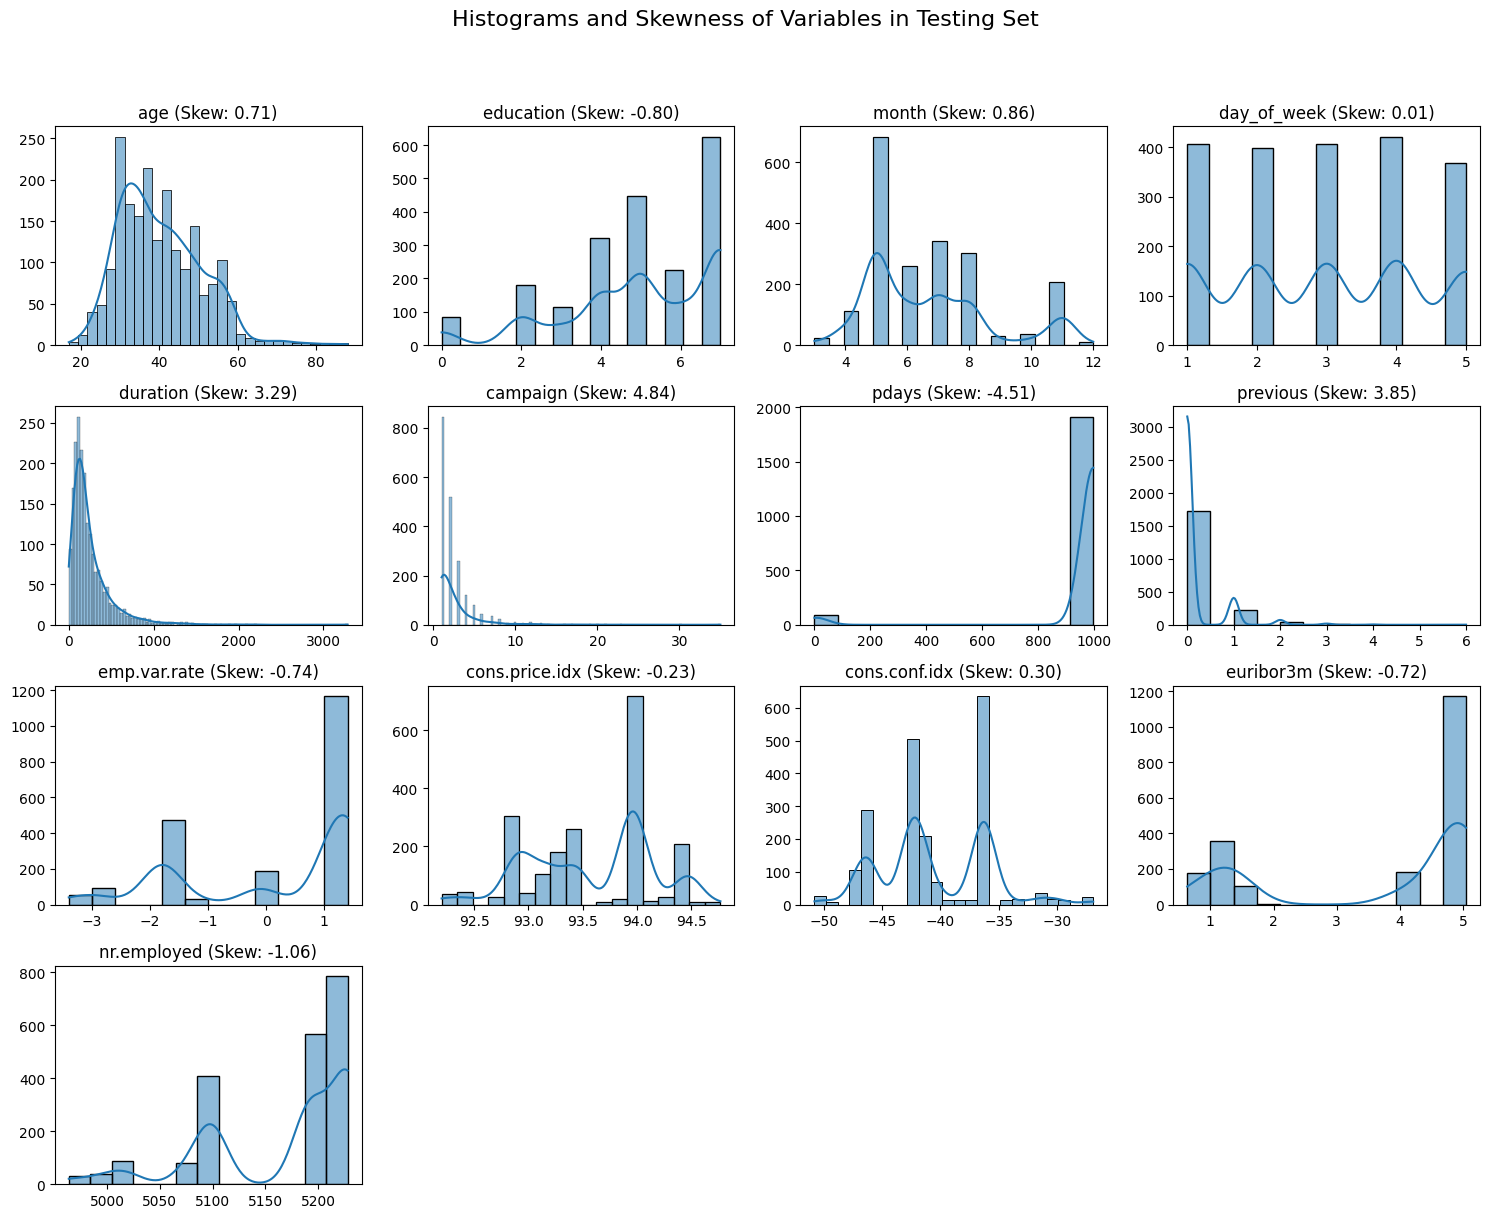

In [ ]:
from scipy.stats import skew

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))
fig.suptitle("Histograms and Skewness of Variables in Testing Set", fontsize=16)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot histograms and display skewness for each variable
for i, col in enumerate(numeric_testing_set.columns):
    # Plot histogram for the current variable
    sns.histplot(numeric_testing_set[col], kde=True, ax=axes[i])

    # Calculate skewness and set the title with skew value
    skew_val = skew(numeric_testing_set[col])
    axes[i].set_title(f'{col} (Skew: {skew_val:.2f})')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


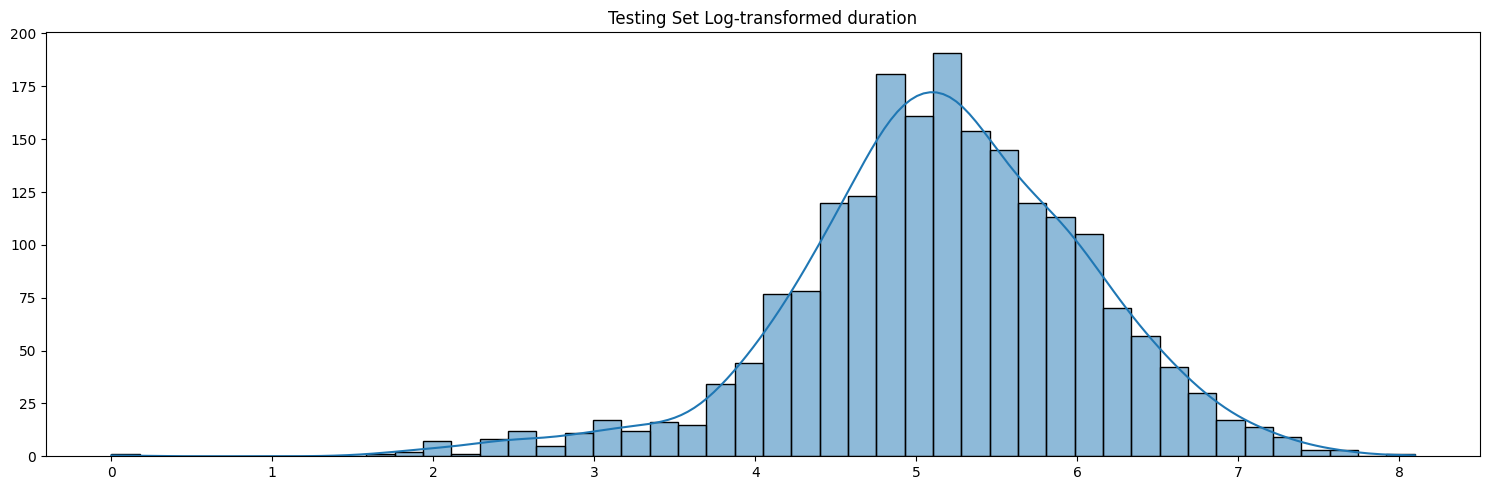

In [ ]:
# Define columns to transform and copy the test data
columns_to_transform_testing_set = ['duration']
data_log_transformed_test_set = numeric_testing_set.copy()
data_log_transformed_test_set[columns_to_transform_testing_set] = np.log1p(data_log_transformed_test_set[columns_to_transform_testing_set])

# Plot histograms for log-transformed columns
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_transform_testing_set), figsize=(15, 5))

# Check if 'axes' is a single object or a list
if len(columns_to_transform_testing_set) == 1:
    axes = [axes]  # Convert to list for consistent indexing

for i, col in enumerate(columns_to_transform_testing_set):
    sns.histplot(data_log_transformed_test_set[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Testing Set Log-transformed {col}')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

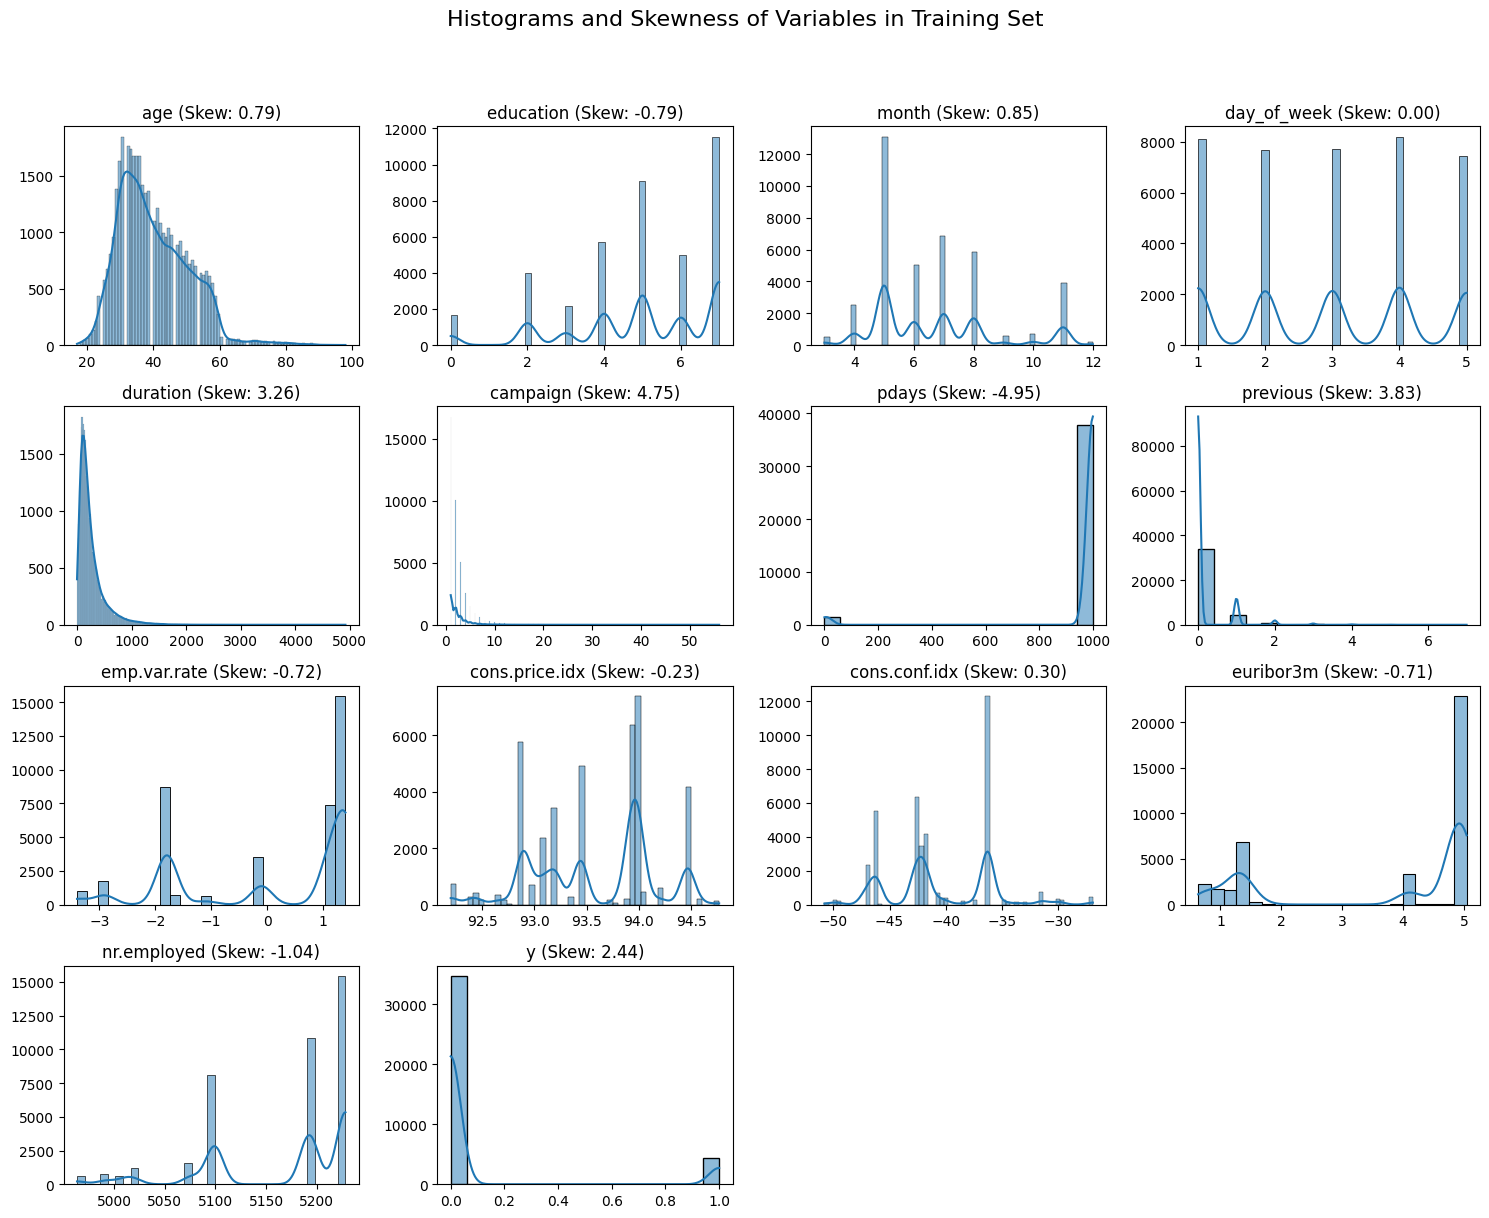

In [ ]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))
fig.suptitle("Histograms and Skewness of Variables in Training Set", fontsize=16)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot histograms and display skewness for each variable
for i, col in enumerate(numeric_training_set.columns):
    # Plot histogram for the current variable
    sns.histplot(numeric_training_set[col], kde=True, ax=axes[i])

    # Calculate skewness and set the title with skew value
    skew_val = skew(numeric_training_set[col])
    axes[i].set_title(f'{col} (Skew: {skew_val:.2f})')
    axes[i].set_xlabel("")  # Remove x-label for clarity
    axes[i].set_ylabel("")  # Remove y-label for clarity

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

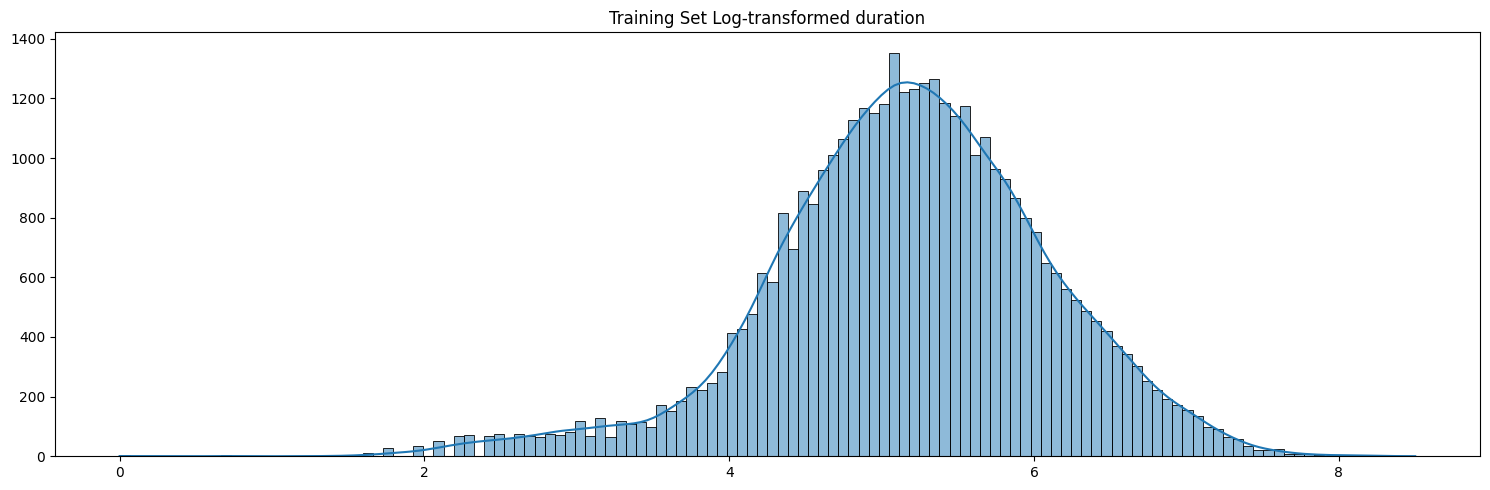

In [ ]:
# Define columns to transform and copy the test data
columns_to_transform_training_set = ['duration']
data_log_transformed_train_set = numeric_training_set.copy()
data_log_transformed_train_set[columns_to_transform_training_set] = np.log1p(data_log_transformed_train_set[columns_to_transform_training_set])

# Plot histograms for log-transformed columns
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_transform_training_set), figsize=(15, 5))

# Check if 'axes' is a single object or a list
if len(columns_to_transform_training_set) == 1:
    axes = [axes]  # Convert to list for consistent indexing

for i, col in enumerate(columns_to_transform_training_set):
    sns.histplot(data_log_transformed_train_set[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Training Set Log-transformed {col}')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
# Define the columns to transform as a list
columns_to_transform_testing_set = ['duration']

# Assuming `testing_set` is your main DataFrame and `data_log_transformed_test_set` is a temporary transformed version
data_log_transformed_test_set = testing_set.copy()

# Apply log transformation and add each as a new column in `testing_set`
for column in columns_to_transform_testing_set:
    # Apply log transformation (using np.log1p to handle zero values)
    testing_set[f'{column}_log'] = np.log1p(data_log_transformed_test_set[column])

# Drop duration and age column
testing_set.drop(columns=['duration'], inplace=True)

# Verify transformation by displaying the first few rows of the updated DataFrame
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2000 non-null   int64  
 1   job             2000 non-null   object 
 2   marital         2000 non-null   object 
 3   education       2000 non-null   int64  
 4   default         2000 non-null   object 
 5   housing         2000 non-null   object 
 6   loan            2000 non-null   object 
 7   contact         2000 non-null   object 
 8   month           2000 non-null   int64  
 9   day_of_week     2000 non-null   int64  
 10  campaign        2000 non-null   int64  
 11  pdays           2000 non-null   int64  
 12  previous        2000 non-null   int64  
 13  poutcome        2000 non-null   object 
 14  emp.var.rate    2000 non-null   float64
 15  cons.price.idx  2000 non-null   float64
 16  cons.conf.idx   2000 non-null   float64
 17  euribor3m       2000 non-null   f

In [ ]:
# Define the columns to transform as a list
columns_to_transform_training_set = ['duration']

# Assuming `testing_set` is your main DataFrame and `data_log_transformed_test_set` is a temporary transformed version
data_log_transformed_training_set = training_set.copy()

# Apply log transformation and add each as a new column in `testing_set`
for column in columns_to_transform_training_set:
    # Apply log transformation (using np.log1p to handle zero values)
    training_set[f'{column}_log'] = np.log1p(data_log_transformed_training_set[column])

# Drop duration and age column
training_set.drop(columns=['duration'], inplace=True)

# Verify transformation by displaying the first few rows of the updated DataFrame
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39177 entries, 0 to 39187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39177 non-null  int64  
 1   job             39177 non-null  object 
 2   marital         39177 non-null  object 
 3   education       39177 non-null  int64  
 4   default         39177 non-null  object 
 5   housing         39177 non-null  object 
 6   loan            39177 non-null  object 
 7   contact         39177 non-null  object 
 8   month           39177 non-null  int64  
 9   day_of_week     39177 non-null  int64  
 10  campaign        39177 non-null  int64  
 11  pdays           39177 non-null  int64  
 12  previous        39177 non-null  int64  
 13  poutcome        39177 non-null  object 
 14  emp.var.rate    39177 non-null  float64
 15  cons.price.idx  39177 non-null  float64
 16  cons.conf.idx   39177 non-null  float64
 17  euribor3m       39177 non-null  floa

In [ ]:
training_set.to_csv('21435050_train.csv', index=False)

### 1.3 Analysis of Machine Learning Models

In [ ]:
# Other categorical variables apply dummy coding
training_set = pd.get_dummies(training_set, columns=['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome'])
testing_set = pd.get_dummies(testing_set, columns=['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome'])

In [ ]:
from sklearn.model_selection import train_test_split

# training_set and testing_set are already defined
# Define the input variables and target variable
X = training_set.drop(columns=['y'])
y = training_set['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of each set
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 31341
Testing set size: 7836


In [ ]:
# Apply normalization on X (both training and test set)

from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [ ]:
# logistic regression model
model_logistic = LogisticRegression(solver="liblinear")
model_logistic.fit(X_train, y_train)
test_score = model_logistic.score(X_test, y_test)
print("Testing Accuracy of Logistic Regression:", test_score)

# SVM for classification
model_svm = SVC()
model_svm.fit(X_train, y_train)
test_score = model_svm.score(X_test, y_test)
print("Testing Accuracy of SVC:", test_score)

Testing Accuracy of Logistic Regression: 0.9156457376212354
Testing Accuracy of SVC: 0.9018631955079122


In [ ]:
# Training accuracy
Y_train_predict_l_model = model_logistic.predict(X_train)
# Validation accuracy
Y_val_predict_l_model = model_logistic.predict(X_test)

In [ ]:
from sklearn.model_selection import KFold

# Set 10-fold cross validation after shuffle the dataset with random state 42
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

from sklearn.model_selection import cross_val_score

model = LogisticRegression(solver="liblinear")
results = cross_val_score(model, X_train_norm, y_train, cv=kfold)
print("Average Accuracy of Logistic Regression:",results.mean())

model = SVC()
results = cross_val_score(model, X_train_norm, y_train, cv=kfold)
print("Average Accuracy of SVM:",results.mean())

Average Accuracy of Logistic Regression: 0.9090648024598249
Average Accuracy of SVM: 0.9009924183900606


In [ ]:
# Build K-mean model
# define input variables
X = training_set.drop(columns=['y'])


# fit scaler on training data
norm = MinMaxScaler().fit(X)
X = norm.transform(X)

# since the income has two classes (0: no, 1: yes), hence we define the cluster number as 2.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print (kmeans)

KMeans(n_clusters=2, random_state=0)


In [ ]:
# check how many data samples have been assigned to each cluster
import numpy as np

kmeans_labels = kmeans.predict(X)
unique_labels, unique_counts = np.unique(kmeans_labels, return_counts=True)
sample_assigned = dict(zip(unique_labels, unique_counts))
print("Data samples have been assigned to each cluster:", sample_assigned )

Data samples have been assigned to each cluster: {0: 14285, 1: 24892}


In [ ]:
# Extract a prototype from each cluster
from sklearn.metrics.pairwise import pairwise_distances_argmin

kmeans_cluster_centers = kmeans.cluster_centers_
closest = pairwise_distances_argmin(kmeans.cluster_centers_, X)

# Show 2 data samples that can represent the 2 clusters
training_set.iloc[closest, :]

,age,education,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
13745,40,5,5,3,3,999,0,1.1,93.994,-36.4,...,False,False,True,False,False,False,True,False,True,False
15128,40,5,11,3,1,999,0,-0.1,93.200,-42.0,...,False,True,True,False,False,True,False,False,True,False


In [ ]:
# Check accuracy of the clustering model
from sklearn.metrics import accuracy_score

y = training_set['y']

accuracy = accuracy_score(y, kmeans_labels)
print("K means prediction accuracy:", accuracy)

K means prediction accuracy: 0.43979886157694564


### 1.4 Model Explainability - Using SHAP framework

In [ ]:
!pip install shap
# import shap library
import shap

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6988
           1       0.68      0.41      0.51       848

    accuracy                           0.92      7836
   macro avg       0.81      0.69      0.73      7836
weighted avg       0.90      0.92      0.91      7836



In [ ]:
# Select only numeric columns
X_train_numerical = X_train.select_dtypes(include=['float64', 'int64'])

record_id = 5
actual_values = X_train_numerical.iloc[record_id, :]
explainer = shap.Explainer(model_logistic, X_train, feature_names=actual_values.index)
shap_values = explainer(X_test)

In [ ]:
print(type(shap_values))
print(shap_values.shape)  # Should give you the shape of the SHAP values

<class 'shap._explanation.Explanation'>
(7836, 43)


In [ ]:
print(X_train.dtypes)
print(X_test.dtypes)
print(X_test.isnull().sum())  # Check for NaNs

age                       int64
education                 int64
month                     int64
day_of_week               int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
duration_log            float64
job_admin.                 bool
job_blue-collar            bool
job_entrepreneur           bool
job_housemaid              bool
job_management             bool
job_retired                bool
job_self-employed          bool
job_services               bool
job_student                bool
job_technician             bool
job_unemployed             bool
job_unknown                bool
marital_divorced           bool
marital_married            bool
marital_single             bool
marital_unknown            bool
default_no                 bool
default_unknown            bool
default_

In [ ]:
# Assuming 'df' is your DataFrame with these boolean columns
bool_columns = [
    'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
    'job_management', 'job_retired', 'job_self-employed', 'job_services',
    'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
    'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown',
    'default_no', 'default_unknown', 'default_yes', 'housing_no',
    'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
    'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent',
    'poutcome_success'
]

# Convert boolean columns to binary (0 or 1)
X_train[bool_columns] = X_train[bool_columns].astype(int)
print(X_train.dtypes)

age                       int64
education                 int64
month                     int64
day_of_week               int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
duration_log            float64
job_admin.                int64
job_blue-collar           int64
job_entrepreneur          int64
job_housemaid             int64
job_management            int64
job_retired               int64
job_self-employed         int64
job_services              int64
job_student               int64
job_technician            int64
job_unemployed            int64
job_unknown               int64
marital_divorced          int64
marital_married           int64
marital_single            int64
marital_unknown           int64
default_no                int64
default_unknown           int64
default_

In [ ]:
record_id = 73
print('Actual values:')
print(X_train.iloc[record_id, :])

print('Actual customer subscription:')
print(y_train.iloc[record_id])

Actual values:
age                       29.000000
education                  7.000000
month                      5.000000
day_of_week                3.000000
campaign                   2.000000
pdays                    999.000000
previous                   0.000000
emp.var.rate               1.100000
cons.price.idx            93.994000
cons.conf.idx            -36.400000
euribor3m                  4.859000
nr.employed             5191.000000
duration_log               7.020191
job_admin.                 0.000000
job_blue-collar            0.000000
job_entrepreneur           0.000000
job_housemaid              0.000000
job_management             0.000000
job_retired                0.000000
job_self-employed          0.000000
job_services               0.000000
job_student                0.000000
job_technician             1.000000
job_unemployed             0.000000
job_unknown                0.000000
marital_divorced           0.000000
marital_married            1.000000
marital_singl

In [ ]:
# Looks like Google Colab needs shap.initjs() in every cell where there is a visualization.
shap.initjs()

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.plots.force(shap_values[record_id])

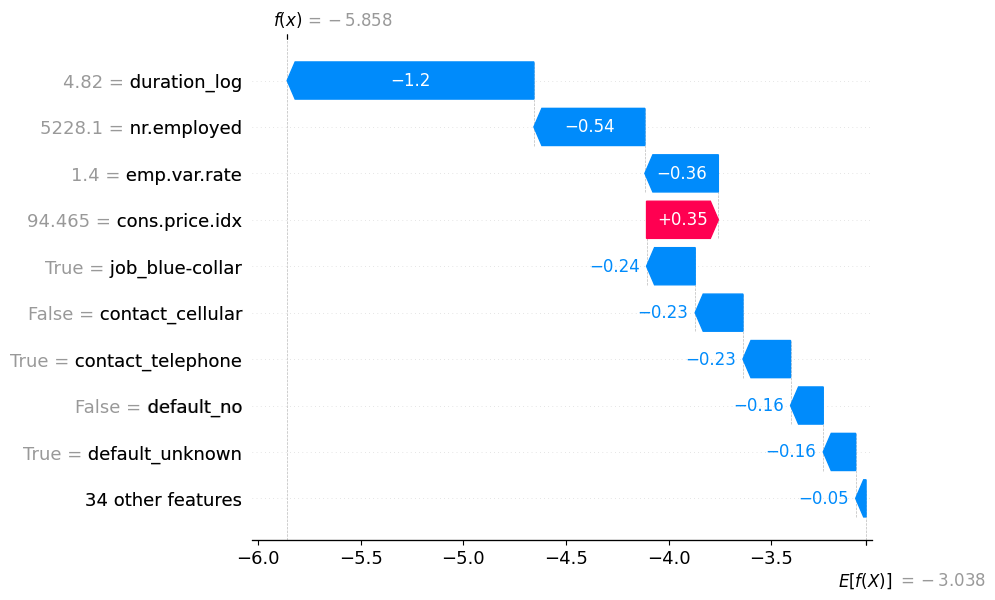

In [ ]:
# visualize the prediction of given record id
shap.plots.waterfall(shap_values[record_id])

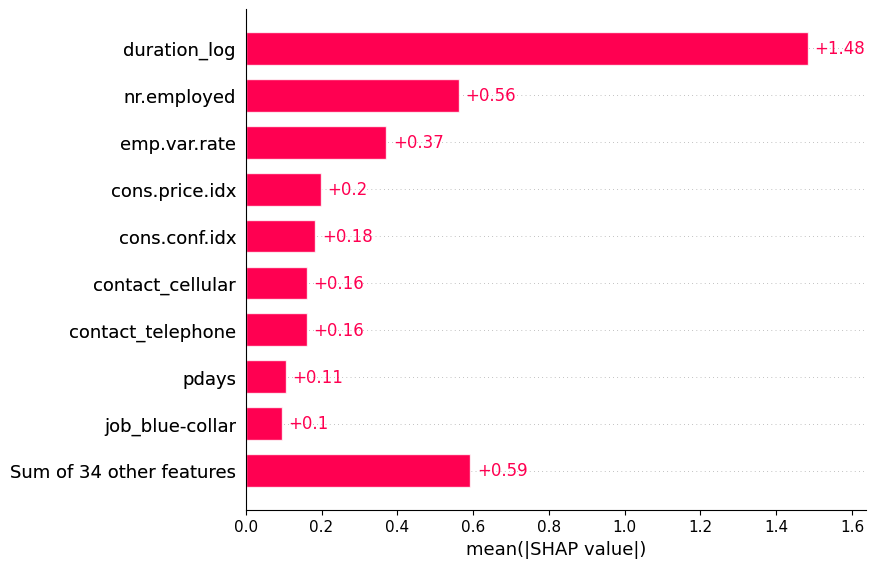

In [ ]:
shap.plots.bar(shap_values)